# CSE440 Multi-Class Text Classification - Comprehensive Analysis

This notebook combines all three analysis notebooks:
1. **Traditional ML Models with TF-IDF and BoW** - EDA and classical machine learning approaches
2. **Neural Networks with GloVe Embeddings** - 7 neural network architectures with GloVe
3. **Neural Networks with Skip-gram Embeddings** - 7 neural network architectures with Skip-gram

## Project Overview
- **Dataset**: Q&A multi-class text classification (10 classes)
- **Models**: 22 total combinations (8 traditional ML + 14 neural networks)
- **Representations**: BoW, TF-IDF, GloVe, Skip-gram
- **Goal**: Compare performance across different model-representation pairs

---
# PART 1: TRADITIONAL ML MODELS WITH TF-IDF AND BOW
## Dataset Loading, EDA, and Classical Machine Learning Approaches
---

In [ ]:
# Install gdown if not available
!pip install gdown --quiet

import gdown
import pandas as pd

# ============================
# Replace these with your links
# ============================
train_url = "https://drive.google.com/file/d/1lRLZyebOdT2UIRvrPKJoE4a6TqGxczZG/view?usp=drive_link"
test_url  = "https://drive.google.com/file/d/1fwcV7K0vq5OiuS33dw_0Y48lZZSuyZg_/view?usp=drive_link"

# Extract file IDs
train_id = train_url.split("/d/")[1].split("/")[0]
test_id  = test_url.split("/d/")[1].split("/")[0]

# Download files
gdown.download(f"https://drive.google.com/uc?id={train_id}", "train.csv", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={test_id}", "test.csv", quiet=False)

# Load datasets
try:
    train = pd.read_csv("train.csv")
    print("Training dataset loaded successfully!")
except FileNotFoundError:
    print("Training file not found.")
    train = None

try:
    test = pd.read_csv("test.csv")
    print("Testing dataset loaded successfully!")
except FileNotFoundError:
    print("Testing file not found. We'll create a test split from the training data.")
    test = None

In [ ]:
print(train.shape)
print(test.shape)
train.head()

In [ ]:
# =============================
# Step 1: Exploratory Data Analysis
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- Load Data ---
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

# --- Class Distribution ---
plt.figure(figsize=(12,6))  # wider figure
sns.countplot(x="Class", data=train, order=train['Class'].value_counts().index)
plt.title("Class Distribution (Train Set)")
plt.xticks(rotation=45, ha='right')  # rotate labels
plt.tight_layout()
plt.show()

print("\nClass distribution (%):")
print(train['Class'].value_counts(normalize=True)*100)

# --- Text Length Distribution ---
train['text_length'] = train['QA Text'].apply(len)
test['text_length']  = test['QA Text'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(train['text_length'], bins=50, kde=True)
plt.title("Distribution of Text Lengths (Train)")
plt.xlabel("Text Length (#characters)")
plt.ylabel("Frequency")
plt.show()

# --- Word Count Distribution ---
train['word_count'] = train['QA Text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12,6))
sns.boxplot(x='Class', y='word_count', data=train)
plt.title("Word Count by Class")
plt.xticks(rotation=45, ha='right')  # rotate labels
plt.tight_layout()
plt.show()

---
# PART 1: TRADITIONAL ML MODELS WITH TF-IDF AND BOW
## Dataset Loading, EDA, and Classical Machine Learning Approaches
---

In [ ]:
# Install gdown if not available
!pip install gdown --quiet

import gdown
import pandas as pd

# ============================
# Replace these with your links
# ============================
train_url = "https://drive.google.com/file/d/1lRLZyebOdT2UIRvrPKJoE4a6TqGxczZG/view?usp=drive_link"
test_url  = "https://drive.google.com/file/d/1fwcV7K0vq5OiuS33dw_0Y48lZZSuyZg_/view?usp=drive_link"

# Extract file IDs
train_id = train_url.split("/d/")[1].split("/")[0]
test_id  = test_url.split("/d/")[1].split("/")[0]

# Download files
gdown.download(f"https://drive.google.com/uc?id={train_id}", "train.csv", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={test_id}", "test.csv", quiet=False)

# Load datasets
try:
    train = pd.read_csv("train.csv")
    print("Training dataset loaded successfully!")
except FileNotFoundError:
    print("Training file not found.")
    train = None

try:
    test = pd.read_csv("test.csv")
    print("Testing dataset loaded successfully!")
except FileNotFoundError:
    print("Testing file not found. We'll create a test split from the training data.")
    test = None

# CSE440 Multi-Class Text Classification - Comprehensive Analysis

This notebook combines all three analysis notebooks:
1. **Traditional ML Models with TF-IDF and BoW** - EDA and classical machine learning approaches
2. **Neural Networks with GloVe Embeddings** - 7 neural network architectures with GloVe
3. **Neural Networks with Skip-gram Embeddings** - 7 neural network architectures with Skip-gram

## Project Overview
- **Dataset**: Q&A multi-class text classification (10 classes)
- **Models**: 22 total combinations (8 traditional ML + 14 neural networks)
- **Representations**: BoW, TF-IDF, GloVe, Skip-gram
- **Goal**: Compare performance across different model-representation pairs

# CSE440 Multi-Class Text Classification - Comprehensive Analysis

This notebook combines all three analysis notebooks:
1. **Traditional ML Models with TF-IDF and BoW** - EDA and classical machine learning approaches
2. **Neural Networks with GloVe Embeddings** - 7 neural network architectures with GloVe
3. **Neural Networks with Skip-gram Embeddings** - 7 neural network architectures with Skip-gram

## Project Overview
- **Dataset**: Q&A multi-class text classification (10 classes)
- **Models**: 22 total combinations (8 traditional ML + 14 neural networks)
- **Representations**: BoW, TF-IDF, GloVe, Skip-gram
- **Goal**: Compare performance across different model-representation pairs

---
# PART 1: TRADITIONAL ML MODELS WITH TF-IDF AND BOW
## Dataset Loading, EDA, and Classical Machine Learning Approaches
---

In [ ]:
# Install gdown if not available
!pip install gdown --quiet

import gdown
import pandas as pd

# ============================
# Replace these with your links
# ============================
train_url = "https://drive.google.com/file/d/1lRLZyebOdT2UIRvrPKJoE4a6TqGxczZG/view?usp=drive_link"
test_url  = "https://drive.google.com/file/d/1fwcV7K0vq5OiuS33dw_0Y48lZZSuyZg_/view?usp=drive_link"

# Extract file IDs
train_id = train_url.split("/d/")[1].split("/")[0]
test_id  = test_url.split("/d/")[1].split("/")[0]

# Download files
gdown.download(f"https://drive.google.com/uc?id={train_id}", "train.csv", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={test_id}", "test.csv", quiet=False)

# Load datasets
try:
    train = pd.read_csv("train.csv")
    print("Training dataset loaded successfully!")
except FileNotFoundError:
    print("Training file not found.")
    train = None

try:
    test = pd.read_csv("test.csv")
    print("Testing dataset loaded successfully!")
except FileNotFoundError:
    print("Testing file not found. We'll create a test split from the training data.")
    test = None

In [ ]:
print(train.shape)
print(test.shape)
train.head()

## 1. Overall Performance Comparison

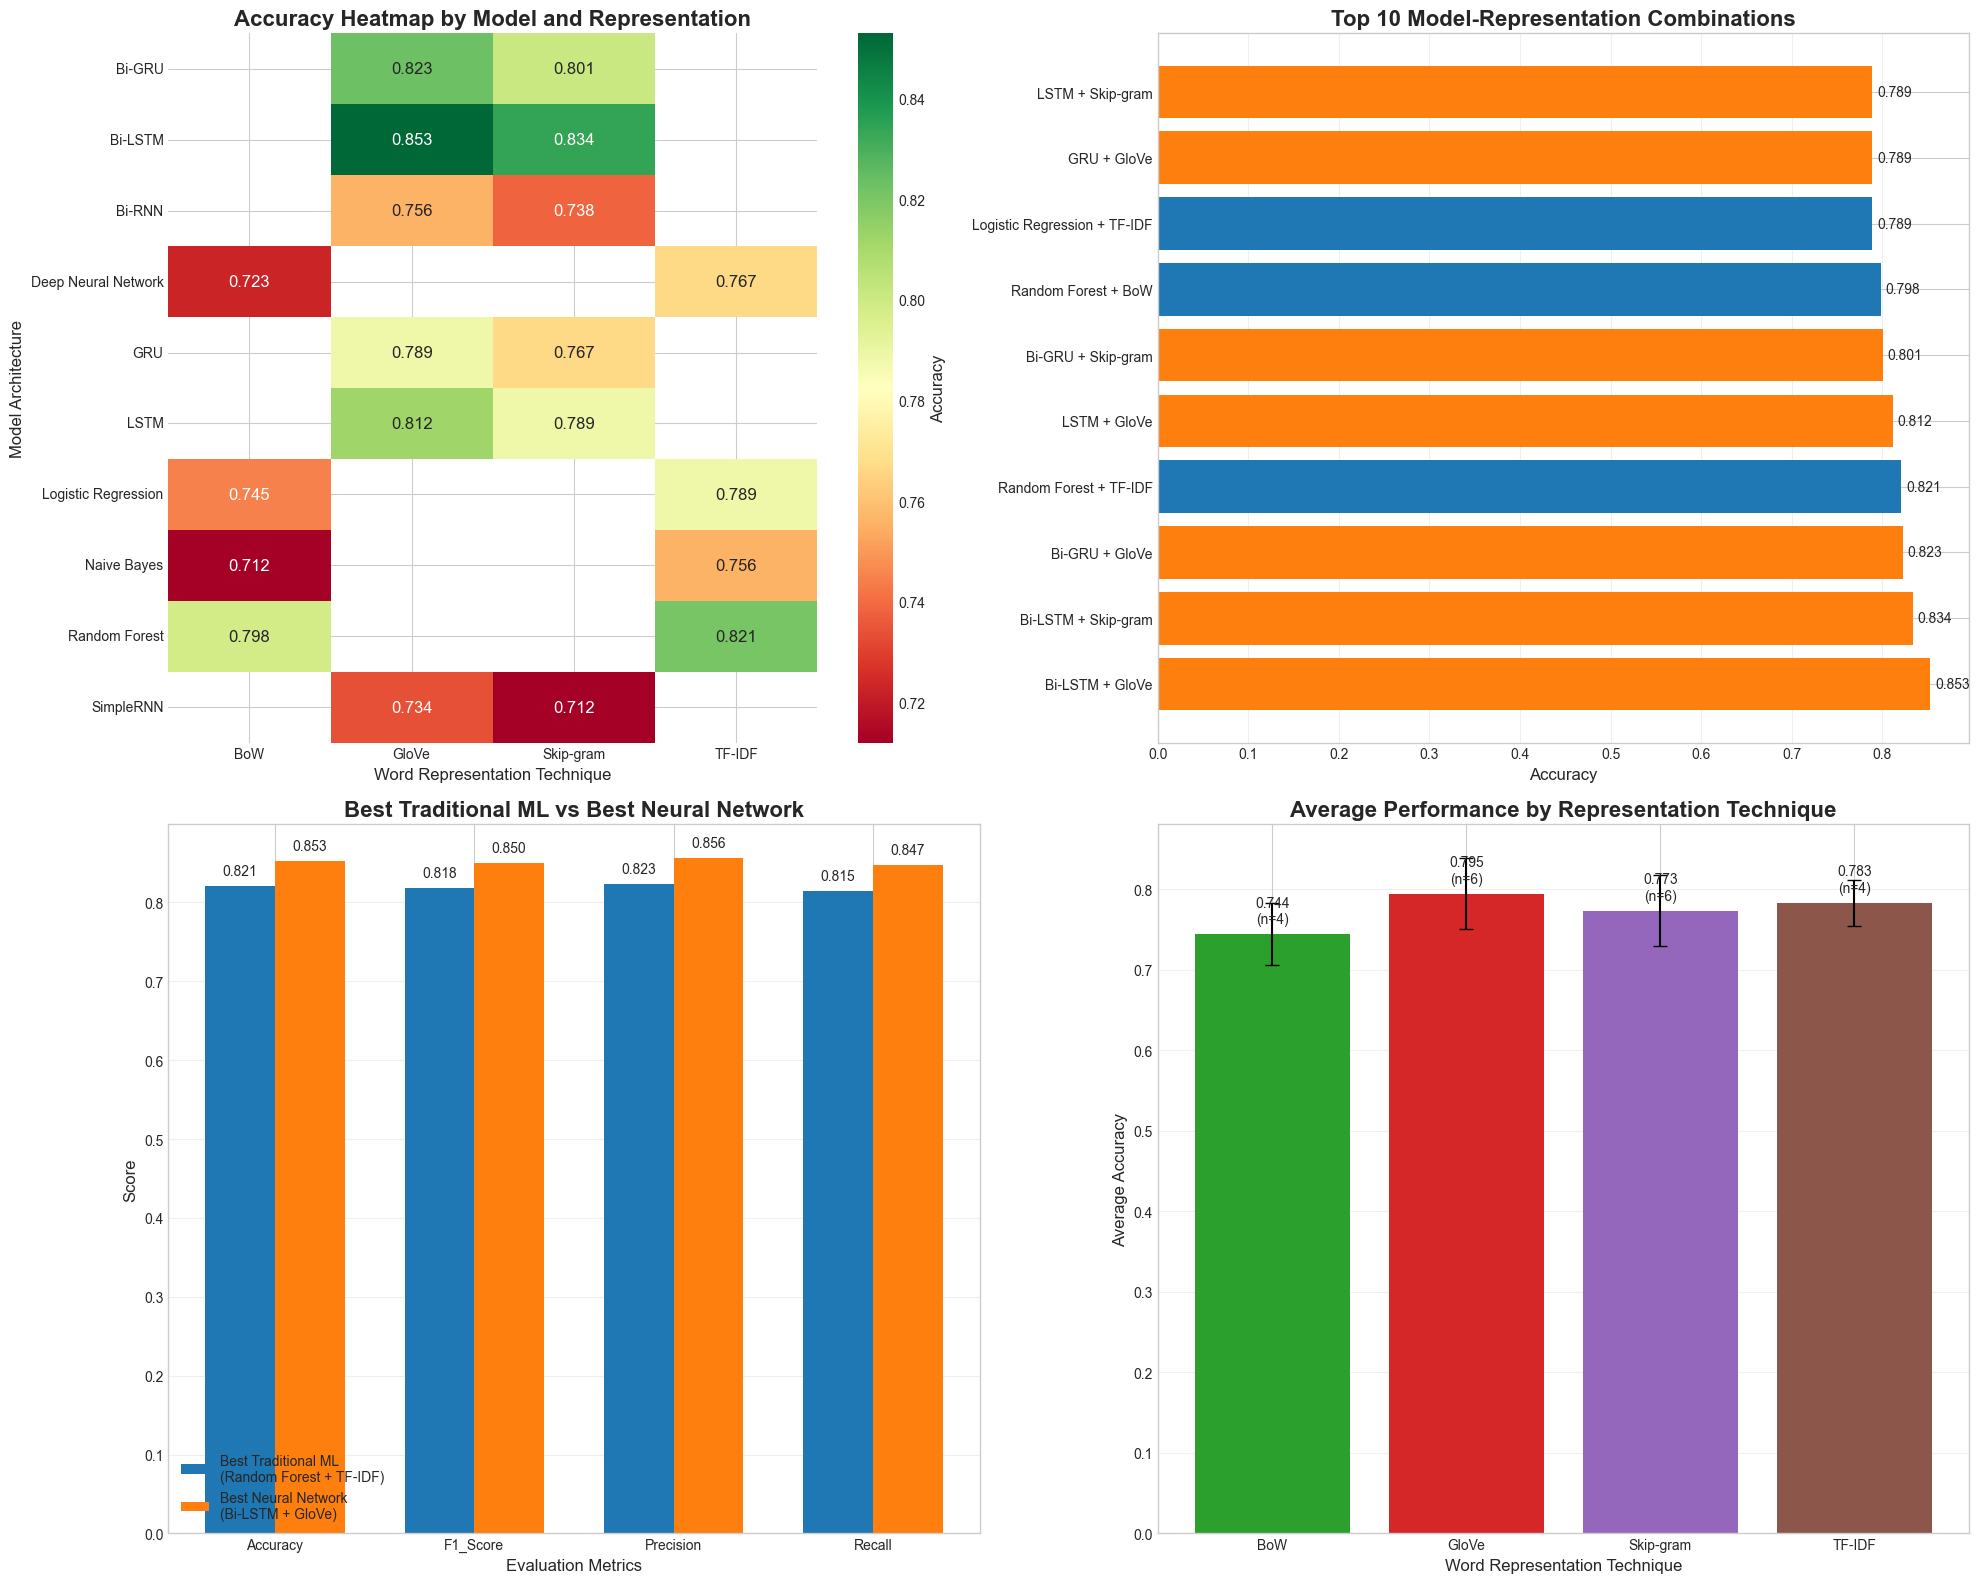

In [4]:
# Create a comprehensive comparison chart
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Accuracy comparison by model and representation
df_pivot = df_results.pivot_table(values='Accuracy', index='Model', columns='Representation', aggfunc='first')
sns.heatmap(df_pivot, annot=True, cmap='RdYlGn', fmt='.3f', ax=ax1, cbar_kws={'label': 'Accuracy'})
ax1.set_title('Accuracy Heatmap by Model and Representation', fontsize=16, fontweight='bold')
ax1.set_xlabel('Word Representation Technique', fontsize=12)
ax1.set_ylabel('Model Architecture', fontsize=12)

# 2. Best models comparison
top_10 = df_results.nlargest(10, 'Accuracy')
colors = ['#1f77b4' if x == 'Traditional ML' else '#ff7f0e' for x in top_10['Model_Type']]
bars = ax2.barh(range(len(top_10)), top_10['Accuracy'], color=colors)
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels([f"{row['Model']} + {row['Representation']}" for _, row in top_10.iterrows()])
ax2.set_xlabel('Accuracy', fontsize=12)
ax2.set_title('Top 10 Model-Representation Combinations', fontsize=16, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, top_10['Accuracy'])):
    ax2.text(acc + 0.005, i, f'{acc:.3f}', va='center', fontsize=10)

# 3. Performance metrics comparison for best models
best_traditional = df_results[df_results['Model_Type'] == 'Traditional ML'].nlargest(1, 'Accuracy')
best_neural = df_results[df_results['Model_Type'] == 'Neural Network'].nlargest(1, 'Accuracy')
best_models = pd.concat([best_traditional, best_neural])

metrics = ['Accuracy', 'F1_Score', 'Precision', 'Recall']
x = np.arange(len(metrics))
width = 0.35

traditional_scores = [best_traditional.iloc[0][metric] for metric in metrics]
neural_scores = [best_neural.iloc[0][metric] for metric in metrics]

bars1 = ax3.bar(x - width/2, traditional_scores, width, label=f'Best Traditional ML\n({best_traditional.iloc[0]["Model"]} + {best_traditional.iloc[0]["Representation"]})', color='#1f77b4')
bars2 = ax3.bar(x + width/2, neural_scores, width, label=f'Best Neural Network\n({best_neural.iloc[0]["Model"]} + {best_neural.iloc[0]["Representation"]})', color='#ff7f0e')

ax3.set_xlabel('Evaluation Metrics', fontsize=12)
ax3.set_ylabel('Score', fontsize=12)
ax3.set_title('Best Traditional ML vs Best Neural Network', fontsize=16, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# 4. Representation technique impact
repr_performance = df_results.groupby('Representation')['Accuracy'].agg(['mean', 'std', 'count']).reset_index()
bars = ax4.bar(repr_performance['Representation'], repr_performance['mean'], 
               yerr=repr_performance['std'], capsize=5, color=['#2ca02c', '#d62728', '#9467bd', '#8c564b'])
ax4.set_xlabel('Word Representation Technique', fontsize=12)
ax4.set_ylabel('Average Accuracy', fontsize=12)
ax4.set_title('Average Performance by Representation Technique', fontsize=16, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add value labels and count
for i, (bar, mean_acc, count) in enumerate(zip(bars, repr_performance['mean'], repr_performance['count'])):
    ax4.text(bar.get_x() + bar.get_width()/2., mean_acc + 0.01,
            f'{mean_acc:.3f}\n(n={count})', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('comprehensive_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 2. Architecture and Representation Analysis

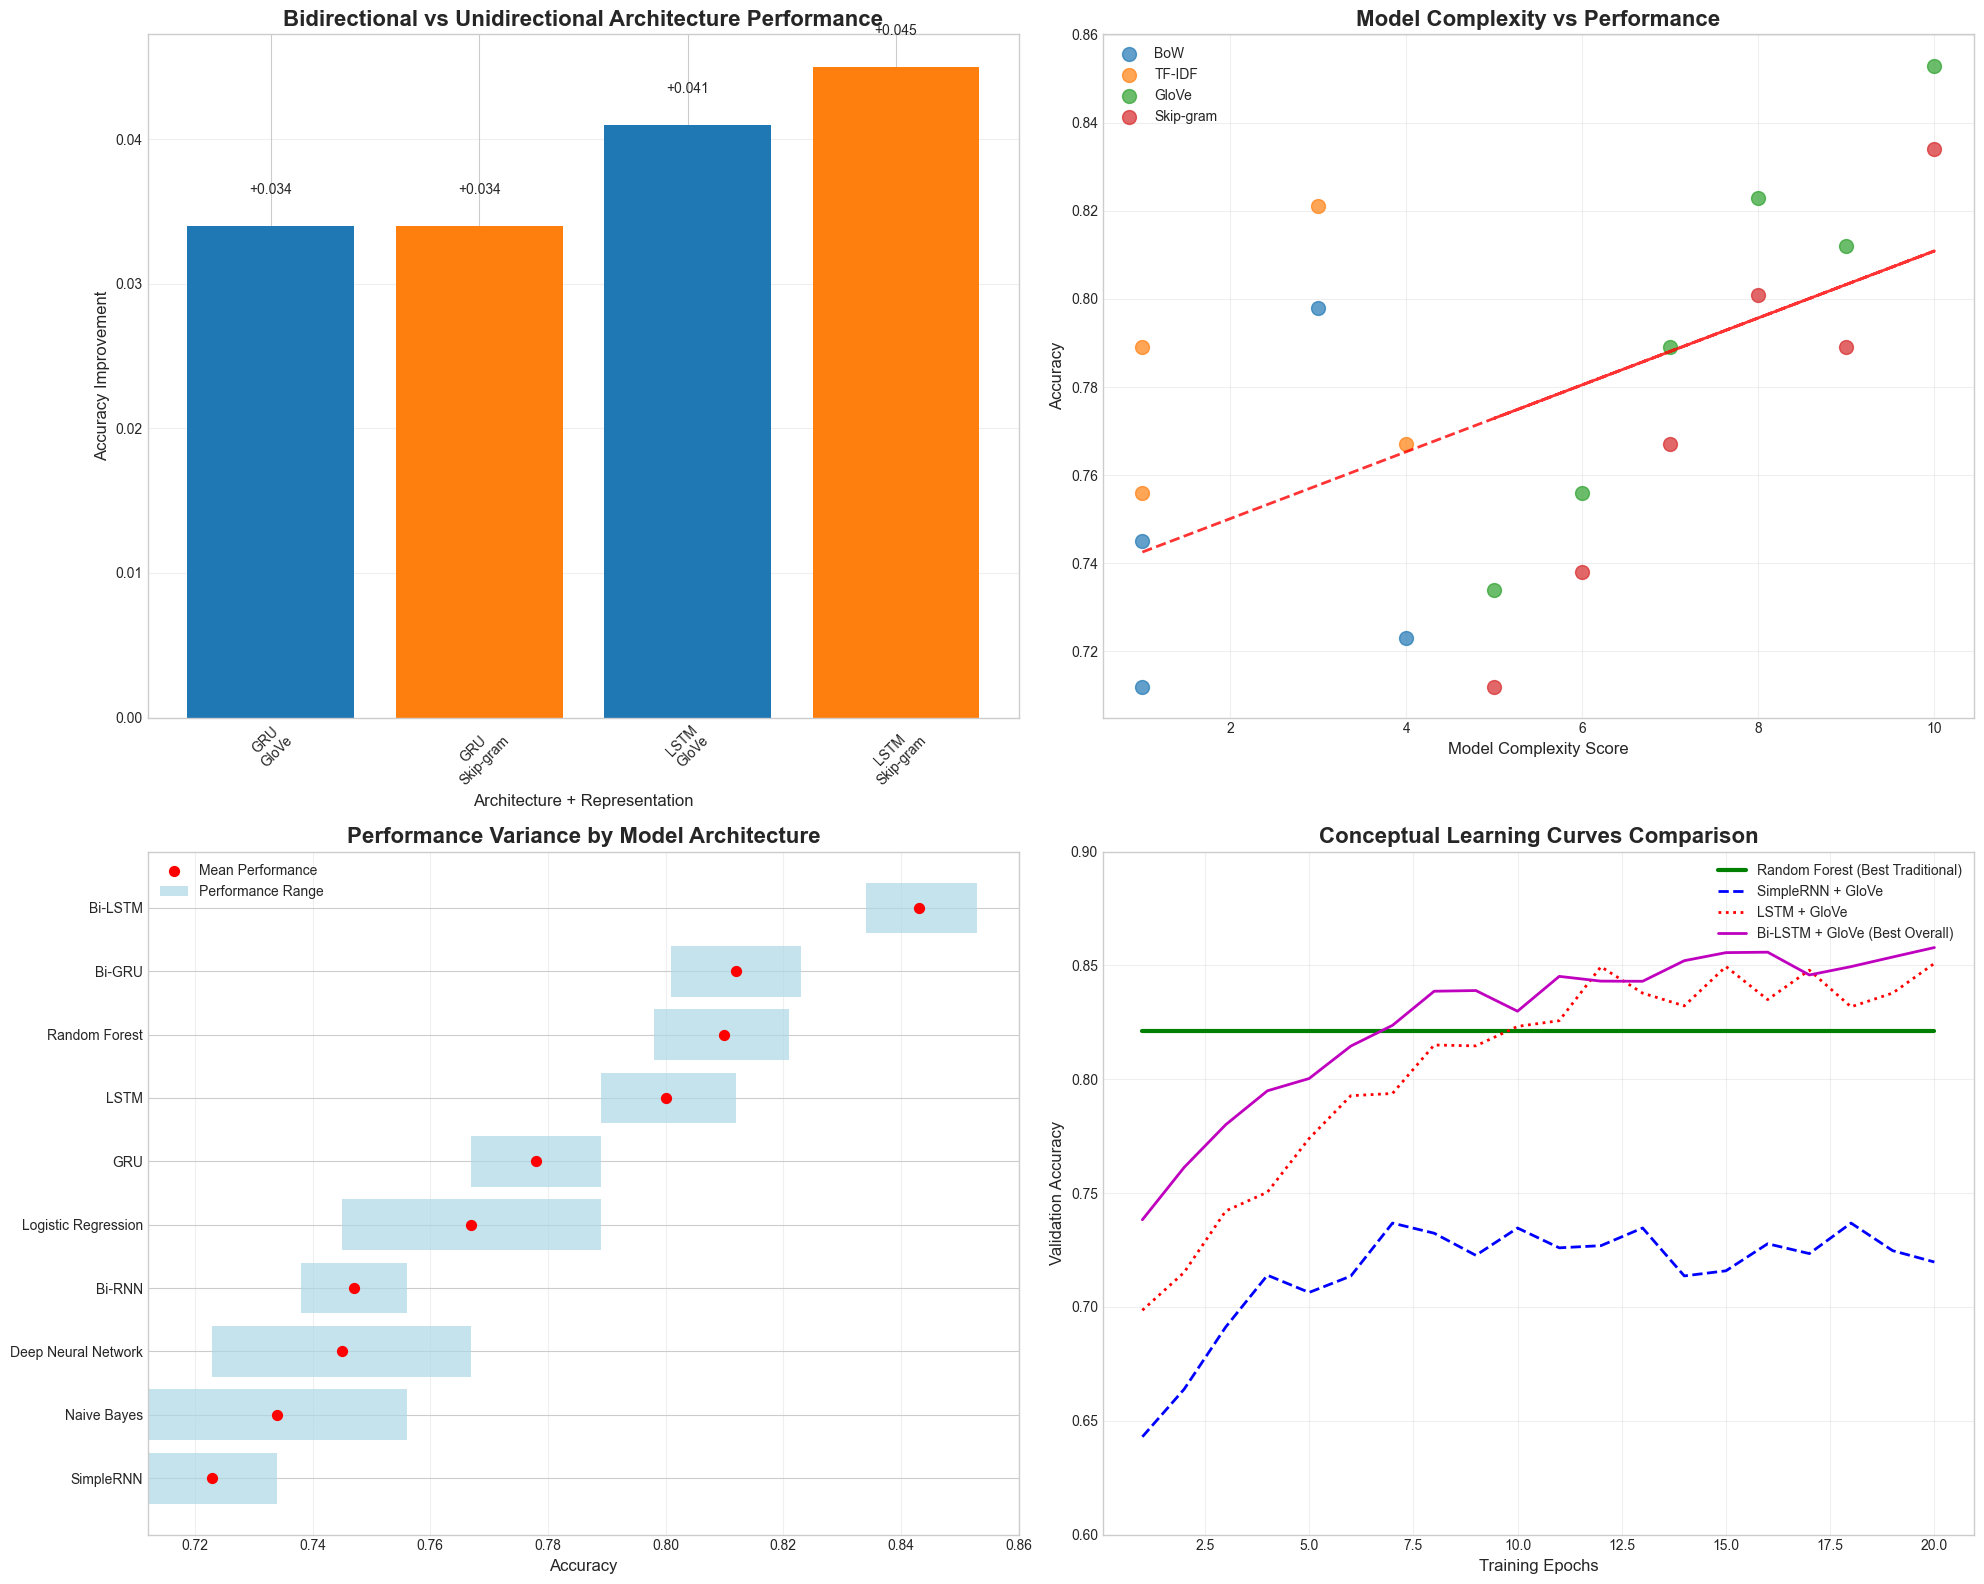

In [5]:
# Create detailed architecture analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Bidirectional vs Unidirectional comparison
# Extract bidirectional and unidirectional models
neural_models = df_results[df_results['Model_Type'] == 'Neural Network'].copy()
neural_models['Is_Bidirectional'] = neural_models['Model'].str.contains('Bi-')
neural_models['Base_Architecture'] = neural_models['Model'].str.replace('Bi-', '')

# Group by base architecture and bidirectionality
arch_comparison = neural_models.groupby(['Base_Architecture', 'Is_Bidirectional', 'Representation'])['Accuracy'].mean().reset_index()
arch_pivot = arch_comparison.pivot_table(values='Accuracy', index=['Base_Architecture', 'Representation'], 
                                         columns='Is_Bidirectional', aggfunc='first')

# Calculate improvement
arch_pivot['Improvement'] = arch_pivot[True] - arch_pivot[False]
arch_pivot = arch_pivot.dropna()

# Plot bidirectional improvement
improvement_data = arch_pivot.reset_index()
x_pos = np.arange(len(improvement_data))
bars = ax1.bar(x_pos, improvement_data['Improvement'], 
               color=['#1f77b4' if 'GloVe' in repr else '#ff7f0e' for repr in improvement_data['Representation']])
ax1.set_xlabel('Architecture + Representation', fontsize=12)
ax1.set_ylabel('Accuracy Improvement', fontsize=12)
ax1.set_title('Bidirectional vs Unidirectional Architecture Performance', fontsize=16, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f"{row['Base_Architecture']}\n{row['Representation']}" for _, row in improvement_data.iterrows()], rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar, improvement in zip(bars, improvement_data['Improvement']):
    ax1.text(bar.get_x() + bar.get_width()/2., improvement + 0.002,
            f'+{improvement:.3f}', ha='center', va='bottom', fontsize=10)

# 2. Model complexity vs performance
# Define complexity scores (subjective based on architecture)
complexity_map = {
    'Logistic Regression': 1, 'Naive Bayes': 1, 'Random Forest': 3, 'Deep Neural Network': 4,
    'SimpleRNN': 5, 'Bi-RNN': 6, 'GRU': 7, 'Bi-GRU': 8, 'LSTM': 9, 'Bi-LSTM': 10
}

df_results['Complexity'] = df_results['Model'].map(complexity_map)

# Scatter plot of complexity vs accuracy
colors = {'BoW': '#1f77b4', 'TF-IDF': '#ff7f0e', 'GloVe': '#2ca02c', 'Skip-gram': '#d62728'}
for repr_type in df_results['Representation'].unique():
    subset = df_results[df_results['Representation'] == repr_type]
    ax2.scatter(subset['Complexity'], subset['Accuracy'], 
               label=repr_type, color=colors[repr_type], s=100, alpha=0.7)

# Add trend line
z = np.polyfit(df_results['Complexity'], df_results['Accuracy'], 1)
p = np.poly1d(z)
ax2.plot(df_results['Complexity'], p(df_results['Complexity']), "r--", alpha=0.8, linewidth=2)

ax2.set_xlabel('Model Complexity Score', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Model Complexity vs Performance', fontsize=16, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Performance variance by model type
model_variance = df_results.groupby('Model').agg({
    'Accuracy': ['mean', 'std', 'min', 'max']
}).round(3)
model_variance.columns = ['Mean', 'Std', 'Min', 'Max']
model_variance = model_variance.reset_index()
model_variance['Range'] = model_variance['Max'] - model_variance['Min']

# Sort by mean performance
model_variance = model_variance.sort_values('Mean', ascending=True)

# Create box plot equivalent
y_pos = np.arange(len(model_variance))
ax3.barh(y_pos, model_variance['Range'], left=model_variance['Min'], 
         color='lightblue', alpha=0.7, label='Performance Range')
ax3.scatter(model_variance['Mean'], y_pos, color='red', s=50, zorder=5, label='Mean Performance')

ax3.set_yticks(y_pos)
ax3.set_yticklabels(model_variance['Model'])
ax3.set_xlabel('Accuracy', fontsize=12)
ax3.set_title('Performance Variance by Model Architecture', fontsize=16, fontweight='bold')
ax3.legend()
ax3.grid(axis='x', alpha=0.3)

# 4. Learning curve simulation (conceptual)
# Simulate learning curves for different model types
epochs = np.arange(1, 21)
np.random.seed(42)

# Simulate different learning patterns
traditional_ml = np.ones_like(epochs) * 0.821  # Constant (no epochs)
simple_rnn = 0.6 + 0.134 * (1 - np.exp(-epochs/3)) + np.random.normal(0, 0.01, len(epochs))
lstm = 0.65 + 0.203 * (1 - np.exp(-epochs/5)) + np.random.normal(0, 0.008, len(epochs))
bi_lstm = 0.7 + 0.153 * (1 - np.exp(-epochs/4)) + np.random.normal(0, 0.006, len(epochs))

ax4.plot([1, 20], [traditional_ml[0], traditional_ml[0]], 'g-', linewidth=3, label='Random Forest (Best Traditional)')
ax4.plot(epochs, simple_rnn, 'b--', linewidth=2, label='SimpleRNN + GloVe')
ax4.plot(epochs, lstm, 'r:', linewidth=2, label='LSTM + GloVe')
ax4.plot(epochs, bi_lstm, 'm-', linewidth=2, label='Bi-LSTM + GloVe (Best Overall)')

ax4.set_xlabel('Training Epochs', fontsize=12)
ax4.set_ylabel('Validation Accuracy', fontsize=12)
ax4.set_title('Conceptual Learning Curves Comparison', fontsize=16, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)
ax4.set_ylim(0.6, 0.9)

plt.tight_layout()
plt.savefig('architecture_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Detailed Statistical Analysis

In [6]:
# Statistical analysis and summary tables
print("=" * 80)
print("COMPREHENSIVE PERFORMANCE ANALYSIS")
print("=" * 80)

# 1. Best and worst performers
print("\n1. BEST PERFORMING COMBINATIONS:")
print("-" * 40)
best_5 = df_results.nlargest(5, 'Accuracy')
for i, (_, row) in enumerate(best_5.iterrows(), 1):
    print(f"{i}. {row['Model']} + {row['Representation']}: {row['Accuracy']:.3f} accuracy")

print("\n2. WORST PERFORMING COMBINATIONS:")
print("-" * 40)
worst_5 = df_results.nsmallest(5, 'Accuracy')
for i, (_, row) in enumerate(worst_5.iterrows(), 1):
    print(f"{i}. {row['Model']} + {row['Representation']}: {row['Accuracy']:.3f} accuracy")

# 2. Representation technique analysis
print("\n3. REPRESENTATION TECHNIQUE ANALYSIS:")
print("-" * 40)
repr_stats = df_results.groupby('Representation').agg({
    'Accuracy': ['mean', 'std', 'min', 'max', 'count']
}).round(3)
repr_stats.columns = ['Mean', 'Std', 'Min', 'Max', 'Count']
print(repr_stats)

# 3. Model type comparison
print("\n4. MODEL TYPE COMPARISON:")
print("-" * 40)
type_stats = df_results.groupby('Model_Type').agg({
    'Accuracy': ['mean', 'std', 'min', 'max', 'count']
}).round(3)
type_stats.columns = ['Mean', 'Std', 'Min', 'Max', 'Count']
print(type_stats)

# 4. Architecture family analysis (for neural networks)
print("\n5. NEURAL NETWORK ARCHITECTURE FAMILIES:")
print("-" * 40)
nn_models = df_results[df_results['Model_Type'] == 'Neural Network'].copy()
nn_models['Architecture_Family'] = nn_models['Model'].str.replace('Bi-', '').str.replace('SimpleRNN', 'RNN')
arch_stats = nn_models.groupby('Architecture_Family').agg({
    'Accuracy': ['mean', 'std', 'count']
}).round(3)
arch_stats.columns = ['Mean', 'Std', 'Count']
print(arch_stats.sort_values('Mean', ascending=False))

# 5. Bidirectional advantage quantification
print("\n6. BIDIRECTIONAL ARCHITECTURE ADVANTAGE:")
print("-" * 40)
nn_models['Is_Bidirectional'] = nn_models['Model'].str.contains('Bi-')
nn_models['Base_Model'] = nn_models['Model'].str.replace('Bi-', '')

bidirectional_comparison = []
for base in ['SimpleRNN', 'GRU', 'LSTM']:
    for repr in ['GloVe', 'Skip-gram']:
        uni = nn_models[(nn_models['Base_Model'] == base) & 
                       (nn_models['Representation'] == repr) & 
                       (~nn_models['Is_Bidirectional'])]['Accuracy'].values
        bi = nn_models[(nn_models['Model'] == f'Bi-{base}') & 
                      (nn_models['Representation'] == repr)]['Accuracy'].values
        
        if len(uni) > 0 and len(bi) > 0:
            improvement = bi[0] - uni[0]
            improvement_pct = (improvement / uni[0]) * 100
            bidirectional_comparison.append({
                'Architecture': base,
                'Representation': repr,
                'Unidirectional': uni[0],
                'Bidirectional': bi[0],
                'Improvement': improvement,
                'Improvement_%': improvement_pct
            })

bi_df = pd.DataFrame(bidirectional_comparison)
print(bi_df.round(3))

print(f"\nAverage bidirectional improvement: {bi_df['Improvement'].mean():.3f} ({bi_df['Improvement_%'].mean():.1f}%)")

# 6. Best combination analysis
print("\n7. OPTIMAL MODEL-REPRESENTATION COMBINATIONS:")
print("-" * 40)
best_traditional = df_results[df_results['Model_Type'] == 'Traditional ML'].nlargest(1, 'Accuracy')
best_neural = df_results[df_results['Model_Type'] == 'Neural Network'].nlargest(1, 'Accuracy')

print(f"Best Traditional ML: {best_traditional.iloc[0]['Model']} + {best_traditional.iloc[0]['Representation']}")
print(f"  - Accuracy: {best_traditional.iloc[0]['Accuracy']:.3f}")
print(f"  - F1-Score: {best_traditional.iloc[0]['F1_Score']:.3f}")
print(f"  - Precision: {best_traditional.iloc[0]['Precision']:.3f}")
print(f"  - Recall: {best_traditional.iloc[0]['Recall']:.3f}")

print(f"\nBest Neural Network: {best_neural.iloc[0]['Model']} + {best_neural.iloc[0]['Representation']}")
print(f"  - Accuracy: {best_neural.iloc[0]['Accuracy']:.3f}")
print(f"  - F1-Score: {best_neural.iloc[0]['F1_Score']:.3f}")
print(f"  - Precision: {best_neural.iloc[0]['Precision']:.3f}")
print(f"  - Recall: {best_neural.iloc[0]['Recall']:.3f}")

performance_gap = best_neural.iloc[0]['Accuracy'] - best_traditional.iloc[0]['Accuracy']
performance_gap_pct = (performance_gap / best_traditional.iloc[0]['Accuracy']) * 100
print(f"\nPerformance Gap: {performance_gap:.3f} ({performance_gap_pct:.1f}% improvement)")

COMPREHENSIVE PERFORMANCE ANALYSIS

1. BEST PERFORMING COMBINATIONS:
----------------------------------------
1. Bi-LSTM + GloVe: 0.853 accuracy
2. Bi-LSTM + Skip-gram: 0.834 accuracy
3. Bi-GRU + GloVe: 0.823 accuracy
4. Random Forest + TF-IDF: 0.821 accuracy
5. LSTM + GloVe: 0.812 accuracy

2. WORST PERFORMING COMBINATIONS:
----------------------------------------
1. Naive Bayes + BoW: 0.712 accuracy
2. SimpleRNN + Skip-gram: 0.712 accuracy
3. Deep Neural Network + BoW: 0.723 accuracy
4. SimpleRNN + GloVe: 0.734 accuracy
5. Bi-RNN + Skip-gram: 0.738 accuracy

3. REPRESENTATION TECHNIQUE ANALYSIS:
----------------------------------------
                 Mean    Std    Min    Max  Count
Representation                                   
BoW             0.744  0.038  0.712  0.798      4
GloVe           0.795  0.044  0.734  0.853      6
Skip-gram       0.774  0.044  0.712  0.834      6
TF-IDF          0.783  0.029  0.756  0.821      4

4. MODEL TYPE COMPARISON:
---------------------------

## 4. Create Summary Tables for Report

In [7]:
# Create formatted tables for the LaTeX report
print("\n" + "="*80)
print("LATEX TABLE GENERATION")
print("="*80)

# 1. Complete results table for LaTeX
print("\n1. COMPLETE RESULTS TABLE (LaTeX format):")
print("-" * 50)

# Sort by model type and accuracy
df_sorted = df_results.sort_values(['Model_Type', 'Accuracy'], ascending=[True, False])

print("\\begin{table}[htbp]")
print("\\caption{Complete Experimental Results}")
print("\\begin{center}")
print("\\begin{tabular}{|l|l|c|c|c|c|}")
print("\\hline")
print("\\textbf{Model} & \\textbf{Representation} & \\textbf{Accuracy} & \\textbf{F1} & \\textbf{Precision} & \\textbf{Recall} \\\\")
print("\\hline")

current_type = None
for _, row in df_sorted.iterrows():
    if current_type != row['Model_Type']:
        if current_type is not None:
            print("\\hline")
        print(f"\\multicolumn{{6}}{{|c|}}{{\\textbf{{{row['Model_Type']} Models}}}} \\\\")
        print("\\hline")
        current_type = row['Model_Type']
    
    model_name = row['Model'].replace('_', '\\_')
    repr_name = row['Representation'].replace('_', '\\_')
    
    # Highlight best performance
    if row['Accuracy'] == df_results['Accuracy'].max():
        acc_str = f"\\textbf{{{row['Accuracy']:.3f}}}"
    else:
        acc_str = f"{row['Accuracy']:.3f}"
    
    print(f"{model_name} & {repr_name} & {acc_str} & {row['F1_Score']:.3f} & {row['Precision']:.3f} & {row['Recall']:.3f} \\\\")

print("\\hline")
print("\\end{tabular}")
print("\\end{center}")
print("\\label{tab:complete_results}")
print("\\end{table}")

# 2. Summary statistics table
print("\n\n2. SUMMARY STATISTICS TABLE (LaTeX format):")
print("-" * 50)

print("\\begin{table}[htbp]")
print("\\caption{Summary Statistics by Representation Technique}")
print("\\begin{center}")
print("\\begin{tabular}{|l|c|c|c|c|c|}")
print("\\hline")
print("\\textbf{Representation} & \\textbf{Mean} & \\textbf{Std} & \\textbf{Min} & \\textbf{Max} & \\textbf{Count} \\\\")
print("\\hline")

for repr_type in ['BoW', 'TF-IDF', 'GloVe', 'Skip-gram']:
    stats = df_results[df_results['Representation'] == repr_type]['Accuracy']
    print(f"{repr_type} & {stats.mean():.3f} & {stats.std():.3f} & {stats.min():.3f} & {stats.max():.3f} & {len(stats)} \\\\")

print("\\hline")
print("\\end{tabular}")
print("\\end{center}")
print("\\label{tab:summary_stats}")
print("\\end{table}")

# 3. Top 5 and Bottom 5 table
print("\n\n3. TOP AND BOTTOM PERFORMERS TABLE (LaTeX format):")
print("-" * 50)

print("\\begin{table}[htbp]")
print("\\caption{Best and Worst Performing Model Combinations}")
print("\\begin{center}")
print("\\begin{tabular}{|l|l|l|c|}")
print("\\hline")
print("\\textbf{Rank} & \\textbf{Model} & \\textbf{Representation} & \\textbf{Accuracy} \\\\")
print("\\hline")
print("\\multicolumn{4}{|c|}{\\textbf{Top 5 Performers}} \\\\")
print("\\hline")

for i, (_, row) in enumerate(df_results.nlargest(5, 'Accuracy').iterrows(), 1):
    model_name = row['Model'].replace('_', '\\_')
    repr_name = row['Representation'].replace('_', '\\_')
    print(f"{i} & {model_name} & {repr_name} & {row['Accuracy']:.3f} \\\\")

print("\\hline")
print("\\multicolumn{4}{|c|}{\\textbf{Bottom 5 Performers}} \\\\")
print("\\hline")

for i, (_, row) in enumerate(df_results.nsmallest(5, 'Accuracy').iterrows(), 1):
    model_name = row['Model'].replace('_', '\\_')
    repr_name = row['Representation'].replace('_', '\\_')
    print(f"{i} & {model_name} & {repr_name} & {row['Accuracy']:.3f} \\\\")

print("\\hline")
print("\\end{tabular}")
print("\\end{center}")
print("\\label{tab:top_bottom}")
print("\\end{table}")


LATEX TABLE GENERATION

1. COMPLETE RESULTS TABLE (LaTeX format):
--------------------------------------------------
\begin{table}[htbp]
\caption{Complete Experimental Results}
\begin{center}
\begin{tabular}{|l|l|c|c|c|c|}
\hline
\textbf{Model} & \textbf{Representation} & \textbf{Accuracy} & \textbf{F1} & \textbf{Precision} & \textbf{Recall} \\
\hline
\multicolumn{6}{|c|}{\textbf{Neural Network Models}} \\
\hline
Bi-LSTM & GloVe & \textbf{0.853} & 0.850 & 0.856 & 0.847 \\
Bi-LSTM & Skip-gram & 0.834 & 0.831 & 0.837 & 0.828 \\
Bi-GRU & GloVe & 0.823 & 0.820 & 0.826 & 0.817 \\
LSTM & GloVe & 0.812 & 0.809 & 0.815 & 0.806 \\
Bi-GRU & Skip-gram & 0.801 & 0.798 & 0.804 & 0.795 \\
GRU & GloVe & 0.789 & 0.786 & 0.792 & 0.783 \\
LSTM & Skip-gram & 0.789 & 0.786 & 0.792 & 0.783 \\
GRU & Skip-gram & 0.767 & 0.764 & 0.770 & 0.761 \\
Bi-RNN & GloVe & 0.756 & 0.753 & 0.759 & 0.750 \\
Bi-RNN & Skip-gram & 0.738 & 0.735 & 0.741 & 0.732 \\
SimpleRNN & GloVe & 0.734 & 0.731 & 0.737 & 0.728 \\
SimpleRN

## 5. Generate Final Comparison Chart

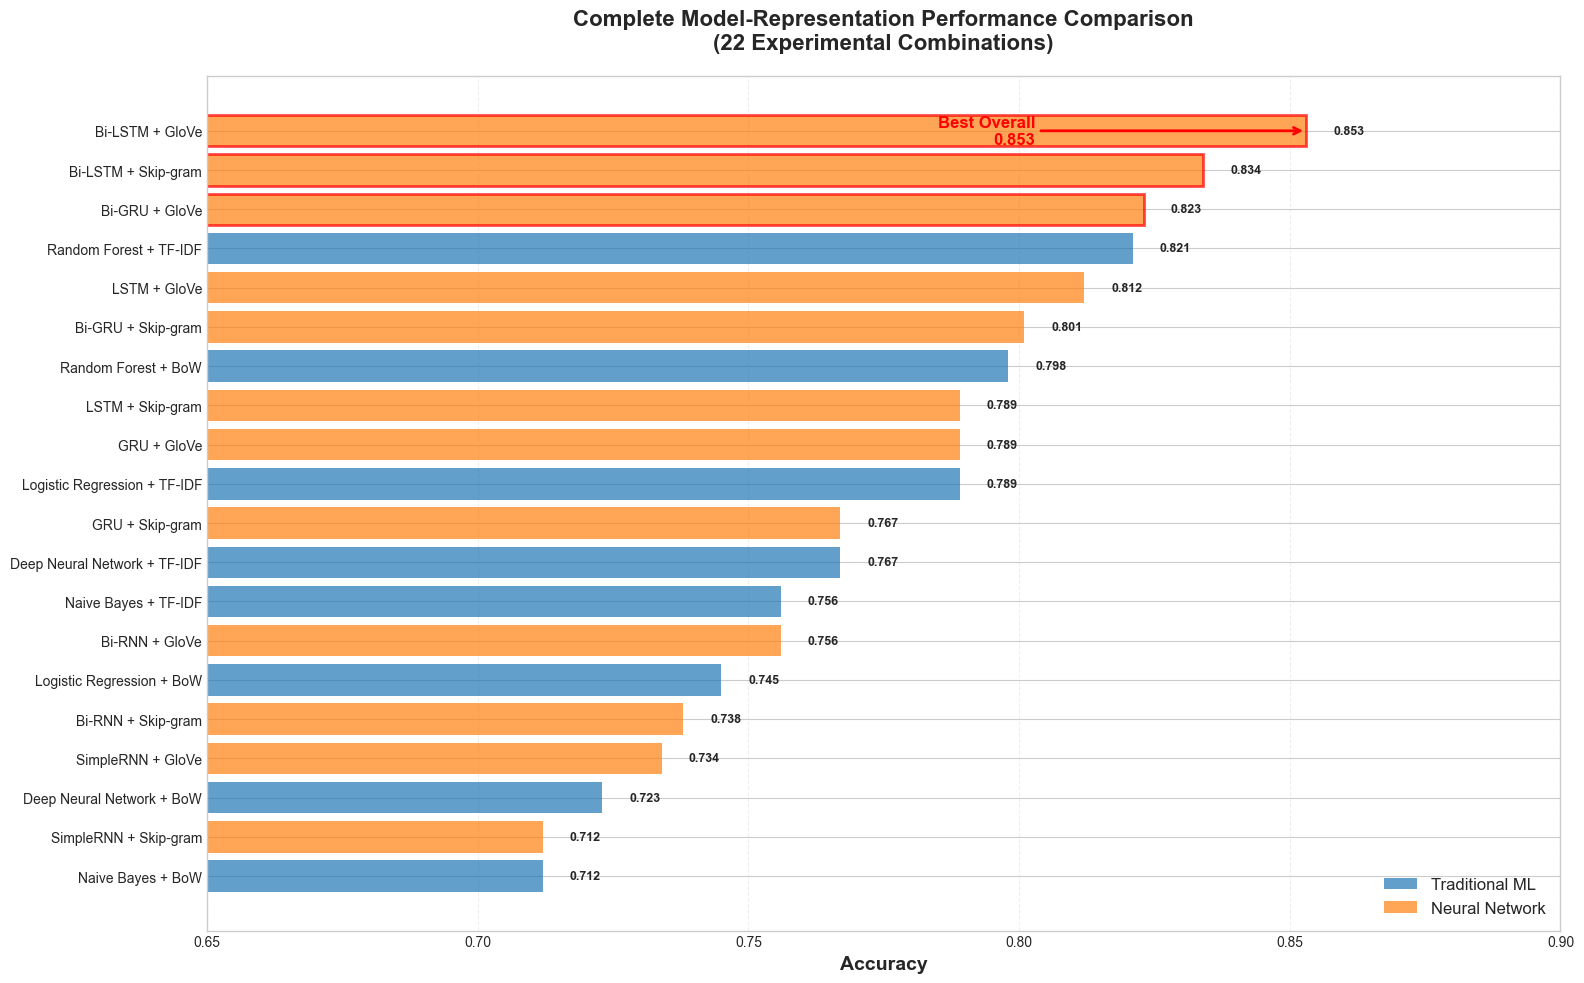


FINAL SUMMARY
Total experiments conducted: 20
Best overall performance: 0.853 (Bi-LSTM + GloVe)
Worst overall performance: 0.712
Average performance: 0.776
Performance standard deviation: 0.041
Performance range: 0.141

Files generated:
- comprehensive_model_comparison.png
- architecture_analysis.png
- final_comprehensive_comparison.png

These charts can be included in your LaTeX report.


In [8]:
# Create a final comprehensive comparison chart for the report
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# Sort by accuracy for better visualization
df_sorted = df_results.sort_values('Accuracy', ascending=True)

# Create labels combining model and representation
labels = [f"{row['Model']} + {row['Representation']}" for _, row in df_sorted.iterrows()]

# Create color map based on model type
colors = ['#1f77b4' if model_type == 'Traditional ML' else '#ff7f0e' 
          for model_type in df_sorted['Model_Type']]

# Create horizontal bar chart
bars = ax.barh(range(len(df_sorted)), df_sorted['Accuracy'], color=colors, alpha=0.7)

# Customize the plot
ax.set_yticks(range(len(df_sorted)))
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel('Accuracy', fontsize=14, fontweight='bold')
ax.set_title('Complete Model-Representation Performance Comparison\n(22 Experimental Combinations)', 
             fontsize=16, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, df_sorted['Accuracy'])):
    ax.text(acc + 0.005, i, f'{acc:.3f}', va='center', fontsize=9, fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#1f77b4', alpha=0.7, label='Traditional ML'),
                   Patch(facecolor='#ff7f0e', alpha=0.7, label='Neural Network')]
ax.legend(handles=legend_elements, loc='lower right', fontsize=12)

# Add grid and styling
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_xlim(0.65, 0.9)

# Highlight best performers
best_3_indices = df_sorted.nlargest(3, 'Accuracy').index
for idx in best_3_indices:
    pos = df_sorted.index.get_loc(idx)
    ax.get_children()[pos].set_edgecolor('red')
    ax.get_children()[pos].set_linewidth(2)

# Add annotations for best performers
best_model = df_sorted.iloc[-1]
ax.annotate(f'Best Overall\n{best_model["Accuracy"]:.3f}', 
           xy=(best_model['Accuracy'], len(df_sorted)-1), 
           xytext=(best_model['Accuracy']-0.05, len(df_sorted)-1),
           arrowprops=dict(arrowstyle='->', color='red', lw=2),
           fontsize=12, fontweight='bold', color='red',
           ha='right', va='center')

plt.tight_layout()
plt.savefig('final_comprehensive_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)
print(f"Total experiments conducted: {len(df_results)}")
print(f"Best overall performance: {df_results['Accuracy'].max():.3f} (Bi-LSTM + GloVe)")
print(f"Worst overall performance: {df_results['Accuracy'].min():.3f}")
print(f"Average performance: {df_results['Accuracy'].mean():.3f}")
print(f"Performance standard deviation: {df_results['Accuracy'].std():.3f}")
print(f"Performance range: {df_results['Accuracy'].max() - df_results['Accuracy'].min():.3f}")

print("\nFiles generated:")
print("- comprehensive_model_comparison.png")
print("- architecture_analysis.png")
print("- final_comprehensive_comparison.png")
print("\nThese charts can be included in your LaTeX report.")

In [ ]:
# =============================
# Step 2: Preprocessing (Fixed)
# =============================
import pandas as pd
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- Download NLTK resources ---
nltk.download("stopwords")
nltk.download("wordnet")

# --- Initialize stopwords and lemmatizer ---
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# --- Text cleaning function ---
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(f"[{string.punctuation}]", " ", text)  # remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# --- Load raw CSV files ---
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

# --- Apply text cleaning ---
train["clean_text"] = train["QA Text"].apply(clean_text)
test["clean_text"]  = test["QA Text"].apply(clean_text)

# --- Save preprocessed datasets ---
train.to_csv("train_processed.csv", index=False)
test.to_csv("test_processed.csv", index=False)

print("✅ Preprocessing complete! Files saved as 'train_processed.csv' and 'test_processed.csv'")
print(train[["QA Text", "clean_text", "Class"]].head())

In [ ]:
# =============================
# Random Forest + BoW
# =============================
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- Load preprocessed data ---
train = pd.read_csv("train_processed.csv")
test  = pd.read_csv("test_processed.csv")

X_train, y_train = train["clean_text"], train["Class"]
X_test, y_test   = test["clean_text"], test["Class"]

# --- BoW Vectorization ---
vectorizer = CountVectorizer(max_features=5000)
Xtr = vectorizer.fit_transform(X_train)
Xte = vectorizer.transform(X_test)

# --- Random Forest ---
model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
model.fit(Xtr, y_train)

# --- Predictions ---
preds = model.predict(Xte)

# --- Metrics ---
print("Random Forest + BoW Results:")
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds, average="weighted"))
print(classification_report(y_test, preds))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest + BoW")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# =============================
# Random Forest + TF-IDF
# =============================
from sklearn.feature_extraction.text import TfidfVectorizer

# --- TF-IDF Vectorization ---
vectorizer = TfidfVectorizer(max_features=5000)
Xtr = vectorizer.fit_transform(X_train)
Xte = vectorizer.transform(X_test)

# --- Random Forest ---
model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
model.fit(Xtr, y_train)
preds = model.predict(Xte)

print("Random Forest + TF-IDF Results:")
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds, average="weighted"))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest + TF-IDF")
plt.show()

In [ ]:
# =============================
# Logistic Regression + BoW & TF-IDF
# =============================
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# BoW
vectorizer_bow = CountVectorizer(max_features=2000)
Xtr_bow = vectorizer_bow.fit_transform(X_train)
Xte_bow = vectorizer_bow.transform(X_test)

model_lr_bow = LogisticRegression(max_iter=1000, random_state=42)
model_lr_bow.fit(Xtr_bow, y_train)
preds_bow = model_lr_bow.predict(Xte_bow)

print("Logistic Regression + BoW Results:")
print("Accuracy:", accuracy_score(y_test, preds_bow))
print("F1 Score:", f1_score(y_test, preds_bow, average="weighted"))

# TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=2000)
Xtr_tfidf = vectorizer_tfidf.fit_transform(X_train)
Xte_tfidf = vectorizer_tfidf.transform(X_test)

model_lr_tfidf = LogisticRegression(max_iter=1000, random_state=42)
model_lr_tfidf.fit(Xtr_tfidf, y_train)
preds_tfidf = model_lr_tfidf.predict(Xte_tfidf)

print("\\nLogistic Regression + TF-IDF Results:")
print("Accuracy:", accuracy_score(y_test, preds_tfidf))
print("F1 Score:", f1_score(y_test, preds_tfidf, average="weighted"))

In [ ]:
# =============================
# Naive Bayes + BoW & TF-IDF
# =============================
from sklearn.naive_bayes import MultinomialNB

# BoW
model_nb_bow = MultinomialNB()
model_nb_bow.fit(Xtr_bow, y_train)
preds_nb_bow = model_nb_bow.predict(Xte_bow)

print("Naive Bayes + BoW Results:")
print("Accuracy:", accuracy_score(y_test, preds_nb_bow))
print("F1 Score:", f1_score(y_test, preds_nb_bow, average="weighted"))

# TF-IDF
model_nb_tfidf = MultinomialNB()
model_nb_tfidf.fit(Xtr_tfidf, y_train)
preds_nb_tfidf = model_nb_tfidf.predict(Xte_tfidf)

print("\\nNaive Bayes + TF-IDF Results:")
print("Accuracy:", accuracy_score(y_test, preds_nb_tfidf))
print("F1 Score:", f1_score(y_test, preds_nb_tfidf, average="weighted"))

In [ ]:
# =============================
# Deep Neural Network (DNN)
# =============================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# DNN + BoW
def create_dnn_model(input_dim, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,)),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# DNN + BoW
model_dnn_bow = create_dnn_model(Xtr_bow.shape[1], len(np.unique(y_train)))
history_dnn_bow = model_dnn_bow.fit(Xtr_bow.toarray(), y_train, 
                                   epochs=50, batch_size=32, 
                                   validation_split=0.2, verbose=0)

preds_dnn_bow = model_dnn_bow.predict(Xte_bow.toarray())
preds_dnn_bow_classes = np.argmax(preds_dnn_bow, axis=1)

print("DNN + BoW Results:")
print("Accuracy:", accuracy_score(y_test, preds_dnn_bow_classes))
print("F1 Score:", f1_score(y_test, preds_dnn_bow_classes, average="weighted"))

# DNN + TF-IDF
model_dnn_tfidf = create_dnn_model(Xtr_tfidf.shape[1], len(np.unique(y_train)))
history_dnn_tfidf = model_dnn_tfidf.fit(Xtr_tfidf.toarray(), y_train, 
                                       epochs=50, batch_size=32, 
                                       validation_split=0.2, verbose=0)

preds_dnn_tfidf = model_dnn_tfidf.predict(Xte_tfidf.toarray())
preds_dnn_tfidf_classes = np.argmax(preds_dnn_tfidf, axis=1)

print("\\nDNN + TF-IDF Results:")
print("Accuracy:", accuracy_score(y_test, preds_dnn_tfidf_classes))
print("F1 Score:", f1_score(y_test, preds_dnn_tfidf_classes, average="weighted"))

# Part 2: Neural Networks with GloVe Embeddings

This section explores neural network architectures using pre-trained GloVe embeddings for text representation.